# HW3 2021300003004 张天骏

# 前三问：

将约束条件带入优化问题得到：$$ v(k)=\underset{k' }{ \max } [\frac{(k^\alpha +(1-\delta)k-k')^{1-\gamma}}{1-\gamma}+\beta v(k')]  $$

最优化问题关于自变量 $k' $求导得到FOC：$$ \beta v(k_{t+1})-(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}=0 $$

应用包络引理得到：$$ v'(k_{t})-(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}(\alpha k^{\alpha-1}_{t}+(1-\delta))=0 $$

两个方程联立得到EE:$$\beta  (k^\alpha_{t+1} +(1-\delta)k_{t+1} -k_{t+2})^{-\gamma}(\alpha k^{\alpha-1}_{t+1}+(1-\delta))=(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}$$

对于稳态$k^*$，带入EE得到：$$k^*=\left[  \frac{1-\beta(1-\delta)}{\alpha \beta} \right] ^{ 1/(\alpha-1)  }$$

# 第四问：

给定$\alpha=\frac{1}{3},\beta=0.95,\delta=0.1,\gamma=1.5$ 可以求出$k^* \approx 3.227$

下面根据参考代码改造得到本问程序：

In [1]:
# import

import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beta = 0.95
alpha = 1 / 3
gamma = 1.5
delta = 0.1
kss = ((1 - beta * (1-delta)) / (alpha * beta)) ** (1 / (alpha - 1))
kmin = 0.5 * kss
kmax = 1.5 * kss
n=300
kgrid = np.linspace(kmin, kmax, n)

In [3]:
# step 1
V0 = np.zeros(n)

In [4]:
# step 2
def V_update(V):
    global gamma
    global delta
    V_new = np.zeros(n)  # initialize updated value function and policy function
    g_new = np.zeros(n)
    for i in range(n):  # loop over grid points
        k = kgrid[i]
        k_bound = k**alpha+(1-delta)*k  # keep non-zero consumption
        V_max = -np.inf  # initialize maximum value
        g_k = kss  # initialize g_k
        for j in range(n):  # loop over possible k_next
            k_next = kgrid[j]
            V_next = V[j]
            if k_next < k_bound:  # check feasibility
                c = k**alpha - k_next + (1-delta)*k
                V_current = (c**(1-gamma))/(1-gamma)+beta*V_next
                if V_current > V_max:
                    V_max = V_current
                    g_k = k_next
        V_new[i] = V_max  # save
        g_new[i] = g_k
    return V_new, g_new

In [5]:
# step 3
def V_iteration(V_initial,tol):
    V = V_initial
    error = np.inf
    count = 0
    max_iter = 1000
    print_skip = 50
    while count < max_iter and error > tol:
        V_new, g_new = V_update(V)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
        if count % print_skip == 0:
            print(f"Error at iteration {count} is {error}.")
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return V_new, g_new

In [6]:
start_time = timeit.default_timer()
V, g = V_iteration(V0,tol=10e-6)
print("The time difference is :", timeit.default_timer() - start_time)

Error at iteration 50 is 0.1556281627721532.
Error at iteration 100 is 0.011973134295722332.
Error at iteration 150 is 0.0009212725223903817.
Error at iteration 200 is 7.088729148563289e-05.

Converged in 239 iterations.
The time difference is : 29.9352207


Text(0.5, 1.0, 'value function')

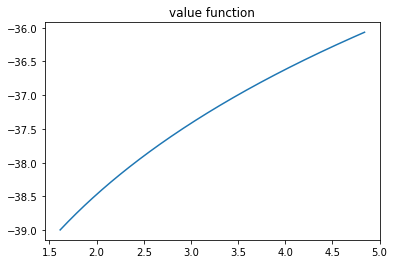

In [7]:
plt.plot(kgrid,V)
plt.title("value function")

Text(0.5, 1.0, 'policy function')

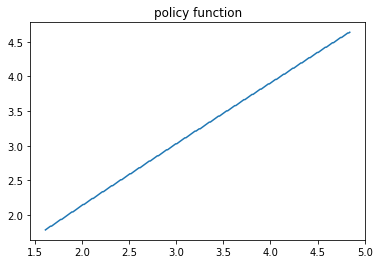

In [8]:
plt.plot(kgrid,g)
plt.title("policy function")

# 第五问

## 5(a)

这里调用课上讲过的欧拉残差函数，经修改后得到网格点数为300，精度为$10^{-6}$时的残差图像

Text(0.5, 1.0, 'Euler residual with tolerance=10e-6 and n(grid)=300')

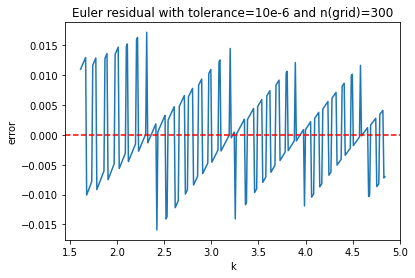

In [9]:
def euler_error(kgrid, g):
    n = len(kgrid)
    err = np.zeros(n)
    for i in range(n):
        k0 = kgrid[i]
        k1 = g[i]
        k1_index = np.argmin(np.abs(kgrid-k1))
        k2 = g[k1_index]
        c0 = (k0)**alpha +(1-delta)*k0 -k1
        c1 = (k1)**alpha +(1-delta)*k1 -k2
        err[i] = (c1/c0)**gamma - beta*(alpha*k1**(alpha-1)+1-delta)
    return err
err = euler_error(kgrid,g)
plt.plot(kgrid,err)
plt.xlabel('k')
plt.ylabel('error')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Euler residual with tolerance=10e-6 and n(grid)=300')

接下来重复相同的步骤，可以依次得到网格点数为300,精度为$10^{-4}，10^{-8}$时的残差图像

Error at iteration 50 is 0.1556281627721532.
Error at iteration 100 is 0.011973134295722332.

Converged in 149 iterations.
Error at iteration 50 is 0.1556281627721532.
Error at iteration 100 is 0.011973134295722332.
Error at iteration 150 is 0.0009212725223903817.
Error at iteration 200 is 7.088729148563289e-05.
Error at iteration 250 is 5.454420900719015e-06.
Error at iteration 300 is 4.196902949615833e-07.

Converged in 328 iterations.


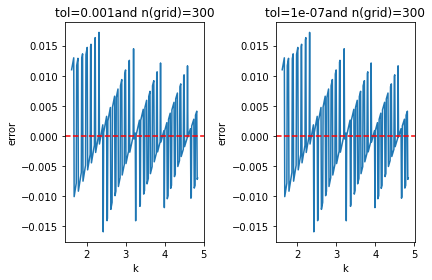

In [10]:
tol=[10e-4,10e-8]
plt.subplots(1,2)
for i in range(2):
    V, g = V_iteration(V0,tol=tol[i])
    err = euler_error(kgrid,g)
    plt.subplot(1,2,i+1)
    plt.plot(kgrid,err)
    plt.xlabel('k')
    plt.ylabel('error')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('tol=' + str(tol[i]) +  'and n(grid)=300')
plt.tight_layout()

## 5(b)

类似于5(a)，重复跑代码便可以得到网格点数为150,600，精度为$10^{-6}$时的残差图像

In [11]:
beta = 0.95
alpha = 1 / 3
gamma = 1.5
delta = 0.1
kss = ((1 - beta * (1-delta)) / (alpha * beta)) ** (1 / (alpha - 1))
kmin = 0.5 * kss
kmax = 1.5 * kss
n=150
kgrid = np.linspace(kmin, kmax, n)

Error at iteration 50 is 0.1556270935463786.
Error at iteration 100 is 0.011973154322092228.
Error at iteration 150 is 0.000921274063315991.
Error at iteration 200 is 7.088741004679378e-05.

Converged in 239 iterations.


Text(0.5, 1.0, 'Euler residual with tolerance=10e-6 and n(grid)=150')

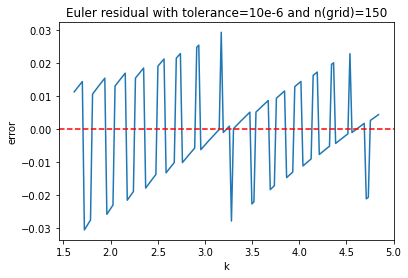

In [12]:
# step 1
V0 = np.zeros(n)

# step 2
def V_update(V):
    global gamma
    global delta
    V_new = np.zeros(n)  # initialize updated value function and policy function
    g_new = np.zeros(n)
    for i in range(n):  # loop over grid points
        k = kgrid[i]
        k_bound = k**alpha+(1-delta)*k  # keep non-zero consumption
        V_max = -np.inf  # initialize maximum value
        g_k = kss  # initialize g_k
        for j in range(n):  # loop over possible k_next
            k_next = kgrid[j]
            V_next = V[j]
            if k_next < k_bound:  # check feasibility
                c = k**alpha - k_next + (1-delta)*k
                V_current = (c**(1-gamma))/(1-gamma)+beta*V_next
                if V_current > V_max:
                    V_max = V_current
                    g_k = k_next
        V_new[i] = V_max  # save
        g_new[i] = g_k
    return V_new, g_new

# step 3
def V_iteration(V_initial,tol):
    V = V_initial
    error = np.inf
    count = 0
    max_iter = 1000
    print_skip = 50
    while count < max_iter and error > tol:
        V_new, g_new = V_update(V)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
        if count % print_skip == 0:
            print(f"Error at iteration {count} is {error}.")
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return V_new, g_new

start_time = timeit.default_timer()
V, g = V_iteration(V0,tol=10e-6)
err = euler_error(kgrid,g)
plt.plot(kgrid,err)
plt.xlabel('k')
plt.ylabel('error')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Euler residual with tolerance=10e-6 and n(grid)=150')

In [13]:
beta = 0.95
alpha = 1 / 3
gamma = 1.5
delta = 0.1
kss = ((1 - beta * (1-delta)) / (alpha * beta)) ** (1 / (alpha - 1))
kmin = 0.5 * kss
kmax = 1.5 * kss
n=600
kgrid = np.linspace(kmin, kmax, n)

Error at iteration 50 is 0.15562863922727388.
Error at iteration 100 is 0.011973137741073003.
Error at iteration 150 is 0.0009212727874938764.
Error at iteration 200 is 7.08873118782094e-05.

Converged in 239 iterations.


Text(0.5, 1.0, 'Euler residual with tolerance=10e-6 and n(grid)=600')

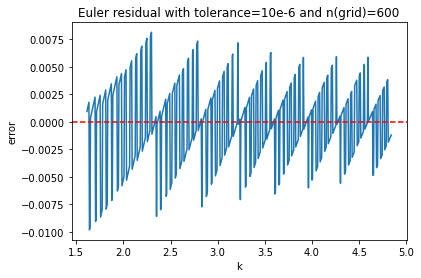

In [14]:
###### step 1
V0 = np.zeros(n)

# step 2
def V_update(V):
    global gamma
    global delta
    V_new = np.zeros(n)  # initialize updated value function and policy function
    g_new = np.zeros(n)
    for i in range(n):  # loop over grid points
        k = kgrid[i]
        k_bound = k**alpha+(1-delta)*k  # keep non-zero consumption
        V_max = -np.inf  # initialize maximum value
        g_k = kss  # initialize g_k
        for j in range(n):  # loop over possible k_next
            k_next = kgrid[j]
            V_next = V[j]
            if k_next < k_bound:  # check feasibility
                c = k**alpha - k_next + (1-delta)*k
                V_current = (c**(1-gamma))/(1-gamma)+beta*V_next
                if V_current > V_max:
                    V_max = V_current
                    g_k = k_next
        V_new[i] = V_max  # save
        g_new[i] = g_k
    return V_new, g_new

# step 3
def V_iteration(V_initial,tol):
    V = V_initial
    error = np.inf
    count = 0
    max_iter = 1000
    print_skip = 50
    while count < max_iter and error > tol:
        V_new, g_new = V_update(V)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
        if count % print_skip == 0:
            print(f"Error at iteration {count} is {error}.")
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return V_new, g_new

start_time = timeit.default_timer()
V, g = V_iteration(V0,tol=10e-6)
err = euler_error(kgrid,g)
plt.plot(kgrid,err)
plt.xlabel('k')
plt.ylabel('error')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Euler residual with tolerance=10e-6 and n(grid)=600')

# ~~第六题~~

~~由于$\mathrm{Value \ Funciton}$是凸函数，$\mathrm{Policy \ Funciton}$是增函数，所以我改变了取点策略，通过凸变换增加了格点左侧的取点数量~~

In [27]:
beta = 0.95
alpha = 1 / 3
gamma = 1.5
delta = 0.1
kss = ((1 - beta * (1-delta)) / (alpha * beta)) ** (1 / (alpha - 1))
kmin = 0.5 * kss
kmax = 1.5 * kss
n = 300
kgrid0 = np.linspace(kmin, kmax, n)
ind=np.linspace(0,1,300)
sqrtind=ind**(0.5)
kgrid=kss * sqrtind + kmin


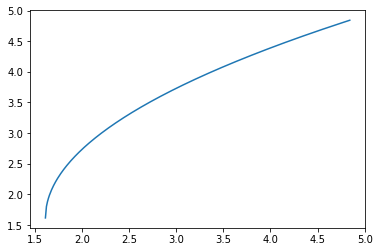

In [29]:
# 凸变换
plt.plot(kgrid0,kgrid)

Error at iteration 50 is 0.1556285904651986.
Error at iteration 100 is 0.011973106940978084.
Error at iteration 150 is 0.0009212603095321015.
Error at iteration 200 is 7.08863517573377e-05.

Converged in 239 iterations.


Text(0.5, 1.0, 'Euler residual with smart gird , tol=10e-6 and n(grid)=300')

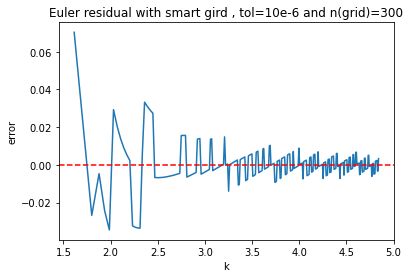

In [28]:
###### step 1
V0 = np.zeros(n)

# step 2
def V_update(V):
    global gamma
    global delta
    V_new = np.zeros(n)  # initialize updated value function and policy function
    g_new = np.zeros(n)
    for i in range(n):  # loop over grid points
        k = kgrid[i]
        k_bound = k**alpha+(1-delta)*k  # keep non-zero consumption
        V_max = -np.inf  # initialize maximum value
        g_k = kss  # initialize g_k
        for j in range(n):  # loop over possible k_next
            k_next = kgrid[j]
            V_next = V[j]
            if k_next < k_bound:  # check feasibility
                c = k**alpha - k_next + (1-delta)*k
                V_current = (c**(1-gamma))/(1-gamma)+beta*V_next
                if V_current > V_max:
                    V_max = V_current
                    g_k = k_next
        V_new[i] = V_max  # save
        g_new[i] = g_k
    return V_new, g_new

# step 3
def V_iteration(V_initial,tol):
    V = V_initial
    error = np.inf
    count = 0
    max_iter = 1000
    print_skip = 50
    while count < max_iter and error > tol:
        V_new, g_new = V_update(V)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
        if count % print_skip == 0:
            print(f"Error at iteration {count} is {error}.")
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return V_new, g_new

start_time = timeit.default_timer()
V, g = V_iteration(V0,tol=10e-6)
err = euler_error(kgrid,g)
plt.plot(kgrid,err)
plt.xlabel('k')
plt.ylabel('error')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Euler residual with smart gird , tol=10e-6 and n(grid)=300')